In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
# splitting the directy loaded data into train and test

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_test.shape
# 10000 pictures with 28 * 28 pixel resolution each

(10000, 28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

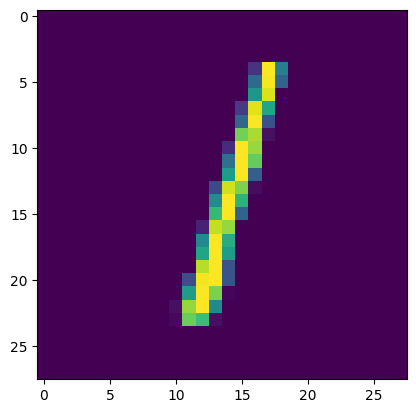

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_test[2])

In [ ]:
#scaling
#before: pixel values range from 0 to 255
#after: pixel values range from 0/255 to 255/255 i.e. 0 - 1
#hence std deviation is significantly reduced
#otherwise there is difficulty in converging weights and biases
X_train=X_train/255
X_test=X_test/255

In [ ]:
#first dimention i.e X_train[0][y][z]
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#model
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
#Flatten-converts higher dimension array to 1D
#no weights or biases from this layer
model.add(Dense(128, activation='relu')) #28*28*128+128=100480
model.add(Dense(32, activation='relu')) #128*32+32=4128
model.add(Dense(10,activation='softmax')) #32*10+3=330

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)
#stores every epoch's metrics -> needed to plot loss and accuracy graphs
#validation_split sets apart 20% data from training(fitting) for validation of model in future

Epoch 1/25
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2814 - accuracy: 0.9175 - val_loss: 0.1415 - val_accuracy: 0.9582
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1214 - accuracy: 0.9635 - val_loss: 0.1203 - val_accuracy: 0.9654
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0874 - accuracy: 0.9737 - val_loss: 0.1008 - val_accuracy: 0.9697
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.1000 - val_accuracy: 0.9694
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0499 - accuracy: 0.9843 - val_loss: 0.0938 - val_accuracy: 0.9734
Epoch 6/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0401 - accuracy: 0.9869 - val_loss: 0.0913 - val_accuracy: 0.9747
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0323 - accuracy: 0.9903 - val_loss: 0.0919 - val_accuracy:

In [ ]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred=y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9748

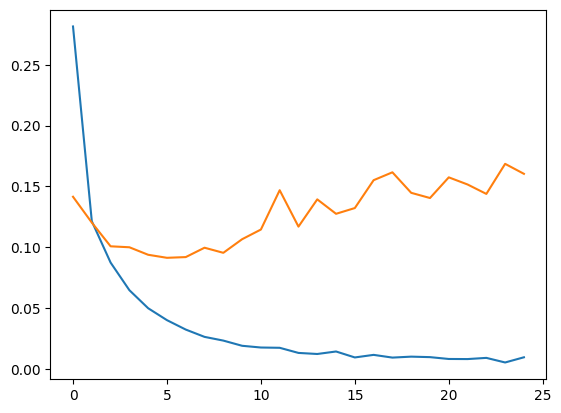

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

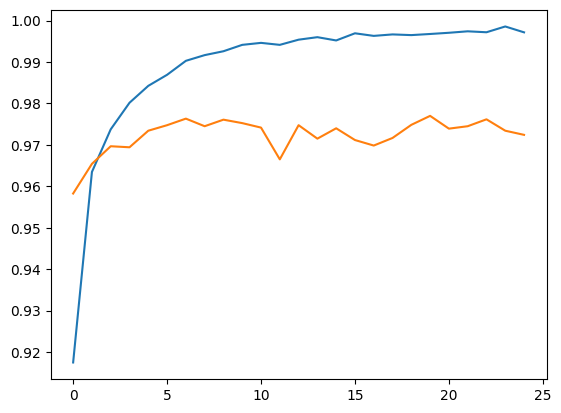

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

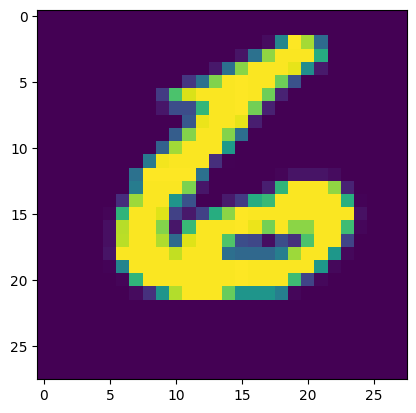

In [ ]:
plt.imshow(X_test[9999])

In [ ]:
model.predict(X_test[9999].reshape(1,28,28)). argmax(axis=1)
#reshape array of size 784 into shape (1,28,28) -> lower dimention to higher

1/1 [==============================] - 0s 22ms/step


array([6])